In [1]:
from scipy import ndimage
import pandas as pd
import numpy as np
from numpy import genfromtxt
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

In [3]:
x1 = genfromtxt('data_magV_1.5.csv', delimiter=',')
x2 = genfromtxt('data_magV_1.6.csv', delimiter=',')
x3 = genfromtxt('data_magV_1.7.csv', delimiter=',')
x4 = genfromtxt('data_magV_1.8.csv', delimiter=',')
x5 = genfromtxt('data_magV_1.9.csv', delimiter=',')
x6 = genfromtxt('data_magV_2.1.csv', delimiter=',')
x7 = genfromtxt('data_magV_2.2.csv', delimiter=',')
x8 = genfromtxt('data_magV_2.3.csv', delimiter=',')
x9 = genfromtxt('data_magV_2.4.csv', delimiter=',')
x10 = genfromtxt('data_magV_2.5.csv', delimiter=',')
x11 = genfromtxt('data_magV_2.6.csv', delimiter=',')
x1 = x1.astype('float32')
x2 = x2.astype('float32')
x3 = x3.astype('float32')
x4 = x4.astype('float32')
x5 = x5.astype('float32')
x6 = x6.astype('float32')
x7 = x7.astype('float32')
x8 = x8.astype('float32')
x9 = x9.astype('float32')
x10 = x10.astype('float32')
x11 = x11.astype('float32')

x_train = np.vstack((x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11))
x_train = np.reshape(x_train, (11, 100, 100, 1))

x_test = genfromtxt('data_magV_2.0.csv', delimiter=',')
x_test = x_test.astype('float32')
x_test = np.reshape(x_test, (1, 100, 100, 1))

In [4]:
tsr_train = np.array([1.5, 1.6, 1.7, 1.8, 1.9, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6])
tsr_test = np.array([2.0])

tsr_train = np.reshape(tsr_train, (11, 1, 1, 1))
tsr_test = np.reshape(tsr_test, (1, 1, 1, 1))

In [5]:
input_img = tf.keras.Input(shape=(100, 100, 1), name='input_img')
input_tsr = tf.keras.Input(shape=(1, 1, 1), name='input_tsr')

x = tf.keras.layers.Conv2D(300, (5, 5), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-05))(input_img)
x = tf.keras.layers.MaxPooling2D((5, 5), padding='same')(x)
x = tf.keras.layers.Conv2D(300, (5, 5), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-05))(x)
encoded = tf.keras.layers.MaxPooling2D((4, 4), padding='same')(x)

reshape1 = tf.keras.layers.Reshape((encoded.shape[1]*encoded.shape[2]*encoded.shape[3], 1))(encoded)
reshape2 = tf.keras.layers.Reshape((input_tsr.shape[1]*input_tsr.shape[2]*input_tsr.shape[3], 1))(input_tsr)
concatt = tf.keras.layers.Concatenate(axis=1)([reshape1, reshape2])
flatten = tf.keras.layers.Flatten()(concatt)
out = tf.keras.layers.Dense(encoded.shape[1]*encoded.shape[2]*encoded.shape[3], activation='relu')(flatten)
reshape = tf.keras.layers.Reshape((encoded.shape[1], encoded.shape[2], encoded.shape[3]))(out)

x = tf.keras.layers.Conv2D(300, (5, 5), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-05))(reshape)
x = tf.keras.layers.UpSampling2D((4, 4))(x)
x = tf.keras.layers.Conv2D(300, (5, 5), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-05))(x)
x = tf.keras.layers.UpSampling2D((5, 5))(x)
decoded = tf.keras.layers.Conv2D(1, (5, 5), activation=None, padding='same')(x)

# 오토인코더 = 인코더 + 디코더
autoencoder = tf.keras.Model([input_img, input_tsr], decoded)

In [6]:
autoencoder.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 100, 100, 30  7800        ['input_img[0][0]']              
                                0)                                                                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 20, 20, 300)  0           ['conv2d[0][0]']                 
                                                                                              

In [7]:
autoencoder.compile(optimizer = tf.keras.optimizers.Adam(0.001),
                    loss = tf.keras.losses.MeanSquaredError(),
                    metrics=[tf.keras.metrics.MeanAbsoluteError(name="mae"),
                            tf.keras.metrics.MeanAbsolutePercentageError(name="mape"),
                            tf.keras.metrics.RootMeanSquaredError(name="rmse"),
                            tf.keras.metrics.MeanSquaredLogarithmicError(name="msle")])

In [8]:
history = autoencoder.fit([x_train, tsr_train], x_train, epochs=5000, shuffle=True)

Epoch 1/5000
1/1 [==============================] - 4s 4s/step - loss: 55.6182 - mae: 7.0812 - mape: 100.2485 - rmse: 7.4572 - msle: 4.1513
Epoch 2/5000
1/1 [==============================] - 0s 61ms/step - loss: 78456.5625 - mae: 261.0134 - mape: 4525.6138 - rmse: 280.1010 - msle: 12.4498
Epoch 3/5000
1/1 [==============================] - 0s 58ms/step - loss: 31.4550 - mae: 4.9056 - mape: 63.2593 - rmse: 5.6077 - msle: 1.0634
Epoch 4/5000
1/1 [==============================] - 0s 58ms/step - loss: 55.0621 - mae: 7.0396 - mape: 99.5307 - rmse: 7.4198 - msle: 4.1516
Epoch 5/5000
1/1 [==============================] - 0s 60ms/step - loss: 55.4090 - mae: 7.0648 - mape: 99.9503 - rmse: 7.4431 - msle: 4.2507
Epoch 6/5000
1/1 [==============================] - 0s 57ms/step - loss: 55.3257 - mae: 7.0592 - mape: 99.8678 - rmse: 7.4375 - msle: 4.2277
Epoch 7/5000
1/1 [==============================] - 0s 58ms/step - loss: 55.2321 - mae: 7.0528 - mape: 99.7684 - rmse: 7.4312 - msle: 4.2017
Epoc

1/1 [==============================] - 0s 56ms/step - loss: 1.9789 - mae: 0.9703 - mape: 16.4627 - rmse: 1.4033 - msle: 0.0391
Epoch 117/5000
1/1 [==============================] - 0s 58ms/step - loss: 1.9746 - mae: 0.9666 - mape: 16.3983 - rmse: 1.4018 - msle: 0.0390
Epoch 118/5000
1/1 [==============================] - 0s 60ms/step - loss: 1.9693 - mae: 0.9654 - mape: 16.3842 - rmse: 1.3999 - msle: 0.0389
Epoch 119/5000
1/1 [==============================] - 0s 57ms/step - loss: 1.9649 - mae: 0.9650 - mape: 16.3936 - rmse: 1.3983 - msle: 0.0388
Epoch 120/5000
1/1 [==============================] - 0s 58ms/step - loss: 1.9605 - mae: 0.9619 - mape: 16.3466 - rmse: 1.3967 - msle: 0.0387
Epoch 121/5000
1/1 [==============================] - 0s 58ms/step - loss: 1.9557 - mae: 0.9607 - mape: 16.3284 - rmse: 1.3950 - msle: 0.0387
Epoch 122/5000
1/1 [==============================] - 0s 57ms/step - loss: 1.9516 - mae: 0.9595 - mape: 16.3004 - rmse: 1.3936 - msle: 0.0386
Epoch 123/5000
1/1 [=

1/1 [==============================] - 0s 58ms/step - loss: 1.6906 - mae: 0.8412 - mape: 14.2894 - rmse: 1.2966 - msle: 0.0333
Epoch 231/5000
1/1 [==============================] - 0s 56ms/step - loss: 1.6893 - mae: 0.8399 - mape: 14.2483 - rmse: 1.2961 - msle: 0.0333
Epoch 232/5000
1/1 [==============================] - 0s 58ms/step - loss: 1.6877 - mae: 0.8402 - mape: 14.2713 - rmse: 1.2955 - msle: 0.0333
Epoch 233/5000
1/1 [==============================] - 0s 56ms/step - loss: 1.6853 - mae: 0.8386 - mape: 14.2438 - rmse: 1.2946 - msle: 0.0332
Epoch 234/5000
1/1 [==============================] - 0s 58ms/step - loss: 1.6841 - mae: 0.8377 - mape: 14.2172 - rmse: 1.2941 - msle: 0.0332
Epoch 235/5000
1/1 [==============================] - 0s 59ms/step - loss: 1.6832 - mae: 0.8382 - mape: 14.2414 - rmse: 1.2938 - msle: 0.0332
Epoch 236/5000
1/1 [==============================] - 0s 58ms/step - loss: 1.6813 - mae: 0.8366 - mape: 14.2049 - rmse: 1.2930 - msle: 0.0331
Epoch 237/5000
1/1 [=

1/1 [==============================] - 0s 59ms/step - loss: 1.5536 - mae: 0.7845 - mape: 13.4072 - rmse: 1.2427 - msle: 0.0306
Epoch 345/5000
1/1 [==============================] - 0s 56ms/step - loss: 1.5525 - mae: 0.7834 - mape: 13.3811 - rmse: 1.2423 - msle: 0.0306
Epoch 346/5000
1/1 [==============================] - 0s 56ms/step - loss: 1.5514 - mae: 0.7829 - mape: 13.3674 - rmse: 1.2418 - msle: 0.0306
Epoch 347/5000
1/1 [==============================] - 0s 61ms/step - loss: 1.5504 - mae: 0.7829 - mape: 13.3834 - rmse: 1.2414 - msle: 0.0306
Epoch 348/5000
1/1 [==============================] - 0s 60ms/step - loss: 1.5493 - mae: 0.7821 - mape: 13.3600 - rmse: 1.2410 - msle: 0.0305
Epoch 349/5000
1/1 [==============================] - 0s 60ms/step - loss: 1.5483 - mae: 0.7817 - mape: 13.3516 - rmse: 1.2406 - msle: 0.0305
Epoch 350/5000
1/1 [==============================] - 0s 62ms/step - loss: 1.5476 - mae: 0.7816 - mape: 13.3625 - rmse: 1.2403 - msle: 0.0305
Epoch 351/5000
1/1 [=

1/1 [==============================] - 0s 57ms/step - loss: 1.4566 - mae: 0.7454 - mape: 12.8163 - rmse: 1.2031 - msle: 0.0288
Epoch 459/5000
1/1 [==============================] - 0s 57ms/step - loss: 1.4555 - mae: 0.7454 - mape: 12.8303 - rmse: 1.2026 - msle: 0.0288
Epoch 460/5000
1/1 [==============================] - 0s 57ms/step - loss: 1.4546 - mae: 0.7443 - mape: 12.8032 - rmse: 1.2023 - msle: 0.0288
Epoch 461/5000
1/1 [==============================] - 0s 58ms/step - loss: 1.4540 - mae: 0.7446 - mape: 12.8168 - rmse: 1.2020 - msle: 0.0288
Epoch 462/5000
1/1 [==============================] - 0s 58ms/step - loss: 1.4536 - mae: 0.7441 - mape: 12.8008 - rmse: 1.2018 - msle: 0.0287
Epoch 463/5000
1/1 [==============================] - 0s 63ms/step - loss: 1.4532 - mae: 0.7446 - mape: 12.8162 - rmse: 1.2017 - msle: 0.0287
Epoch 464/5000
1/1 [==============================] - 0s 58ms/step - loss: 1.4523 - mae: 0.7436 - mape: 12.7969 - rmse: 1.2013 - msle: 0.0287
Epoch 465/5000
1/1 [=

1/1 [==============================] - 0s 57ms/step - loss: 1.3762 - mae: 0.7152 - mape: 12.3696 - rmse: 1.1692 - msle: 0.0273
Epoch 573/5000
1/1 [==============================] - 0s 58ms/step - loss: 1.3759 - mae: 0.7166 - mape: 12.4149 - rmse: 1.1691 - msle: 0.0273
Epoch 574/5000
1/1 [==============================] - 0s 58ms/step - loss: 1.3761 - mae: 0.7156 - mape: 12.3538 - rmse: 1.1692 - msle: 0.0273
Epoch 575/5000
1/1 [==============================] - 0s 58ms/step - loss: 1.3760 - mae: 0.7188 - mape: 12.4537 - rmse: 1.1691 - msle: 0.0273
Epoch 576/5000
1/1 [==============================] - 0s 58ms/step - loss: 1.3765 - mae: 0.7168 - mape: 12.3564 - rmse: 1.1693 - msle: 0.0273
Epoch 577/5000
1/1 [==============================] - 0s 56ms/step - loss: 1.3760 - mae: 0.7199 - mape: 12.4720 - rmse: 1.1691 - msle: 0.0273
Epoch 578/5000
1/1 [==============================] - 0s 59ms/step - loss: 1.3753 - mae: 0.7163 - mape: 12.3541 - rmse: 1.1688 - msle: 0.0273
Epoch 579/5000
1/1 [=

1/1 [==============================] - 0s 59ms/step - loss: 1.2998 - mae: 0.6928 - mape: 12.0500 - rmse: 1.1361 - msle: 0.0259
Epoch 687/5000
1/1 [==============================] - 0s 57ms/step - loss: 1.2993 - mae: 0.6912 - mape: 11.9860 - rmse: 1.1359 - msle: 0.0259
Epoch 688/5000
1/1 [==============================] - 0s 59ms/step - loss: 1.2986 - mae: 0.6926 - mape: 12.0451 - rmse: 1.1356 - msle: 0.0259
Epoch 689/5000
1/1 [==============================] - 0s 59ms/step - loss: 1.2982 - mae: 0.6909 - mape: 11.9848 - rmse: 1.1354 - msle: 0.0258
Epoch 690/5000
1/1 [==============================] - 0s 57ms/step - loss: 1.2969 - mae: 0.6915 - mape: 12.0214 - rmse: 1.1349 - msle: 0.0259
Epoch 691/5000
1/1 [==============================] - 0s 59ms/step - loss: 1.2960 - mae: 0.6900 - mape: 11.9883 - rmse: 1.1344 - msle: 0.0258
Epoch 692/5000
1/1 [==============================] - 0s 57ms/step - loss: 1.2948 - mae: 0.6903 - mape: 11.9950 - rmse: 1.1339 - msle: 0.0258
Epoch 693/5000
1/1 [=

1/1 [==============================] - 0s 57ms/step - loss: 1.2295 - mae: 0.6714 - mape: 11.7131 - rmse: 1.1048 - msle: 0.0246
Epoch 801/5000
1/1 [==============================] - 0s 61ms/step - loss: 1.2286 - mae: 0.6718 - mape: 11.7195 - rmse: 1.1044 - msle: 0.0246
Epoch 802/5000
1/1 [==============================] - 0s 60ms/step - loss: 1.2283 - mae: 0.6718 - mape: 11.7358 - rmse: 1.1043 - msle: 0.0246
Epoch 803/5000
1/1 [==============================] - 0s 57ms/step - loss: 1.2282 - mae: 0.6722 - mape: 11.7124 - rmse: 1.1042 - msle: 0.0246
Epoch 804/5000
1/1 [==============================] - 0s 56ms/step - loss: 1.2275 - mae: 0.6725 - mape: 11.7486 - rmse: 1.1039 - msle: 0.0246
Epoch 805/5000
1/1 [==============================] - 0s 58ms/step - loss: 1.2268 - mae: 0.6713 - mape: 11.6940 - rmse: 1.1036 - msle: 0.0245
Epoch 806/5000
1/1 [==============================] - 0s 57ms/step - loss: 1.2260 - mae: 0.6716 - mape: 11.7385 - rmse: 1.1032 - msle: 0.0245
Epoch 807/5000
1/1 [=

1/1 [==============================] - 0s 56ms/step - loss: 1.1721 - mae: 0.6575 - mape: 11.5449 - rmse: 1.0786 - msle: 0.0235
Epoch 915/5000
1/1 [==============================] - 0s 60ms/step - loss: 1.1734 - mae: 0.6602 - mape: 11.5420 - rmse: 1.0792 - msle: 0.0235
Epoch 916/5000
1/1 [==============================] - 0s 59ms/step - loss: 1.1742 - mae: 0.6609 - mape: 11.5882 - rmse: 1.0795 - msle: 0.0235
Epoch 917/5000
1/1 [==============================] - 0s 56ms/step - loss: 1.1733 - mae: 0.6612 - mape: 11.5477 - rmse: 1.0791 - msle: 0.0235
Epoch 918/5000
1/1 [==============================] - 0s 59ms/step - loss: 1.1716 - mae: 0.6590 - mape: 11.5650 - rmse: 1.0783 - msle: 0.0235
Epoch 919/5000
1/1 [==============================] - 0s 57ms/step - loss: 1.1697 - mae: 0.6575 - mape: 11.5047 - rmse: 1.0775 - msle: 0.0234
Epoch 920/5000
1/1 [==============================] - 0s 57ms/step - loss: 1.1684 - mae: 0.6562 - mape: 11.5251 - rmse: 1.0768 - msle: 0.0234
Epoch 921/5000
1/1 [=

1/1 [==============================] - 0s 61ms/step - loss: 1.1390 - mae: 0.6623 - mape: 11.4881 - rmse: 1.0631 - msle: 0.0228
Epoch 1029/5000
1/1 [==============================] - 0s 57ms/step - loss: 1.1279 - mae: 0.6488 - mape: 11.4342 - rmse: 1.0579 - msle: 0.0227
Epoch 1030/5000
1/1 [==============================] - 0s 56ms/step - loss: 1.1263 - mae: 0.6451 - mape: 11.3462 - rmse: 1.0572 - msle: 0.0226
Epoch 1031/5000
1/1 [==============================] - 0s 59ms/step - loss: 1.1308 - mae: 0.6532 - mape: 11.4118 - rmse: 1.0593 - msle: 0.0227
Epoch 1032/5000
1/1 [==============================] - 0s 56ms/step - loss: 1.1306 - mae: 0.6537 - mape: 11.5082 - rmse: 1.0592 - msle: 0.0227
Epoch 1033/5000
1/1 [==============================] - 0s 60ms/step - loss: 1.1265 - mae: 0.6484 - mape: 11.3435 - rmse: 1.0572 - msle: 0.0226
Epoch 1034/5000
1/1 [==============================] - 0s 59ms/step - loss: 1.1244 - mae: 0.6453 - mape: 11.3734 - rmse: 1.0563 - msle: 0.0226
Epoch 1035/5000

1/1 [==============================] - 0s 58ms/step - loss: 1.0883 - mae: 0.6337 - mape: 11.1616 - rmse: 1.0391 - msle: 0.0220
Epoch 1143/5000
1/1 [==============================] - 0s 57ms/step - loss: 1.1043 - mae: 0.6571 - mape: 11.5684 - rmse: 1.0468 - msle: 0.0223
Epoch 1144/5000
1/1 [==============================] - 0s 57ms/step - loss: 1.1198 - mae: 0.6744 - mape: 11.5956 - rmse: 1.0541 - msle: 0.0224
Epoch 1145/5000
1/1 [==============================] - 0s 58ms/step - loss: 1.1143 - mae: 0.6692 - mape: 11.7331 - rmse: 1.0515 - msle: 0.0224
Epoch 1146/5000
1/1 [==============================] - 0s 58ms/step - loss: 1.1024 - mae: 0.6499 - mape: 11.3073 - rmse: 1.0459 - msle: 0.0221
Epoch 1147/5000
1/1 [==============================] - 0s 61ms/step - loss: 1.0903 - mae: 0.6356 - mape: 11.2391 - rmse: 1.0400 - msle: 0.0220
Epoch 1148/5000
1/1 [==============================] - 0s 61ms/step - loss: 1.0889 - mae: 0.6338 - mape: 11.1993 - rmse: 1.0394 - msle: 0.0220
Epoch 1149/5000

1/1 [==============================] - 0s 57ms/step - loss: 1.0601 - mae: 0.6254 - mape: 11.0928 - rmse: 1.0255 - msle: 0.0215
Epoch 1257/5000
1/1 [==============================] - 0s 57ms/step - loss: 1.0590 - mae: 0.6242 - mape: 10.9992 - rmse: 1.0250 - msle: 0.0215
Epoch 1258/5000
1/1 [==============================] - 0s 58ms/step - loss: 1.0580 - mae: 0.6225 - mape: 11.0518 - rmse: 1.0244 - msle: 0.0215
Epoch 1259/5000
1/1 [==============================] - 0s 58ms/step - loss: 1.0575 - mae: 0.6215 - mape: 10.9709 - rmse: 1.0242 - msle: 0.0214
Epoch 1260/5000
1/1 [==============================] - 0s 57ms/step - loss: 1.0571 - mae: 0.6214 - mape: 11.0299 - rmse: 1.0240 - msle: 0.0215
Epoch 1261/5000
1/1 [==============================] - 0s 61ms/step - loss: 1.0572 - mae: 0.6211 - mape: 10.9678 - rmse: 1.0241 - msle: 0.0214
Epoch 1262/5000
1/1 [==============================] - 0s 59ms/step - loss: 1.0571 - mae: 0.6218 - mape: 11.0328 - rmse: 1.0240 - msle: 0.0215
Epoch 1263/5000

1/1 [==============================] - 0s 58ms/step - loss: 1.0371 - mae: 0.6124 - mape: 10.8930 - rmse: 1.0142 - msle: 0.0211
Epoch 1371/5000
1/1 [==============================] - 0s 59ms/step - loss: 1.0367 - mae: 0.6123 - mape: 10.8424 - rmse: 1.0141 - msle: 0.0211
Epoch 1372/5000
1/1 [==============================] - 0s 60ms/step - loss: 1.0365 - mae: 0.6114 - mape: 10.8800 - rmse: 1.0139 - msle: 0.0211
Epoch 1373/5000
1/1 [==============================] - 0s 60ms/step - loss: 1.0357 - mae: 0.6114 - mape: 10.8341 - rmse: 1.0136 - msle: 0.0211
Epoch 1374/5000
1/1 [==============================] - 0s 57ms/step - loss: 1.0352 - mae: 0.6106 - mape: 10.8627 - rmse: 1.0133 - msle: 0.0211
Epoch 1375/5000
1/1 [==============================] - 0s 58ms/step - loss: 1.0348 - mae: 0.6100 - mape: 10.8219 - rmse: 1.0131 - msle: 0.0211
Epoch 1376/5000
1/1 [==============================] - 0s 58ms/step - loss: 1.0345 - mae: 0.6097 - mape: 10.8463 - rmse: 1.0130 - msle: 0.0211
Epoch 1377/5000

1/1 [==============================] - 0s 59ms/step - loss: 1.0232 - mae: 0.6072 - mape: 10.8191 - rmse: 1.0074 - msle: 0.0209
Epoch 1485/5000
1/1 [==============================] - 0s 56ms/step - loss: 1.0239 - mae: 0.6082 - mape: 10.7644 - rmse: 1.0078 - msle: 0.0209
Epoch 1486/5000
1/1 [==============================] - 0s 58ms/step - loss: 1.0245 - mae: 0.6094 - mape: 10.8541 - rmse: 1.0081 - msle: 0.0209
Epoch 1487/5000
1/1 [==============================] - 0s 59ms/step - loss: 1.0256 - mae: 0.6103 - mape: 10.7828 - rmse: 1.0086 - msle: 0.0209
Epoch 1488/5000
1/1 [==============================] - 0s 59ms/step - loss: 1.0267 - mae: 0.6122 - mape: 10.8996 - rmse: 1.0091 - msle: 0.0210
Epoch 1489/5000
1/1 [==============================] - 0s 56ms/step - loss: 1.0282 - mae: 0.6134 - mape: 10.8110 - rmse: 1.0099 - msle: 0.0209
Epoch 1490/5000
1/1 [==============================] - 0s 56ms/step - loss: 1.0293 - mae: 0.6163 - mape: 10.9528 - rmse: 1.0105 - msle: 0.0210
Epoch 1491/5000

1/1 [==============================] - 0s 56ms/step - loss: 1.0119 - mae: 0.5998 - mape: 10.6623 - rmse: 1.0019 - msle: 0.0207
Epoch 1599/5000
1/1 [==============================] - 0s 62ms/step - loss: 1.0124 - mae: 0.6013 - mape: 10.7220 - rmse: 1.0021 - msle: 0.0207
Epoch 1600/5000
1/1 [==============================] - 0s 59ms/step - loss: 1.0127 - mae: 0.6008 - mape: 10.6657 - rmse: 1.0022 - msle: 0.0207
Epoch 1601/5000
1/1 [==============================] - 0s 56ms/step - loss: 1.0130 - mae: 0.6023 - mape: 10.7414 - rmse: 1.0024 - msle: 0.0207
Epoch 1602/5000
1/1 [==============================] - 0s 60ms/step - loss: 1.0139 - mae: 0.6030 - mape: 10.6803 - rmse: 1.0028 - msle: 0.0207
Epoch 1603/5000
1/1 [==============================] - 0s 59ms/step - loss: 1.0153 - mae: 0.6060 - mape: 10.8011 - rmse: 1.0035 - msle: 0.0208
Epoch 1604/5000
1/1 [==============================] - 0s 58ms/step - loss: 1.0176 - mae: 0.6091 - mape: 10.7472 - rmse: 1.0047 - msle: 0.0207
Epoch 1605/5000

1/1 [==============================] - 0s 57ms/step - loss: 1.0045 - mae: 0.5972 - mape: 10.6566 - rmse: 0.9982 - msle: 0.0206
Epoch 1713/5000
1/1 [==============================] - 0s 62ms/step - loss: 1.0036 - mae: 0.5952 - mape: 10.5906 - rmse: 0.9978 - msle: 0.0205
Epoch 1714/5000
1/1 [==============================] - 0s 59ms/step - loss: 1.0024 - mae: 0.5946 - mape: 10.6115 - rmse: 0.9972 - msle: 0.0205
Epoch 1715/5000
1/1 [==============================] - 0s 57ms/step - loss: 1.0018 - mae: 0.5935 - mape: 10.5864 - rmse: 0.9968 - msle: 0.0205
Epoch 1716/5000
1/1 [==============================] - 0s 58ms/step - loss: 1.0016 - mae: 0.5935 - mape: 10.5780 - rmse: 0.9968 - msle: 0.0205
Epoch 1717/5000
1/1 [==============================] - 0s 58ms/step - loss: 1.0021 - mae: 0.5944 - mape: 10.6148 - rmse: 0.9970 - msle: 0.0205
Epoch 1718/5000
1/1 [==============================] - 0s 60ms/step - loss: 1.0030 - mae: 0.5951 - mape: 10.5850 - rmse: 0.9974 - msle: 0.0205
Epoch 1719/5000

1/1 [==============================] - 0s 56ms/step - loss: 0.9967 - mae: 0.5908 - mape: 10.5206 - rmse: 0.9943 - msle: 0.0204
Epoch 1827/5000
1/1 [==============================] - 0s 58ms/step - loss: 0.9981 - mae: 0.5933 - mape: 10.5939 - rmse: 0.9950 - msle: 0.0205
Epoch 1828/5000
1/1 [==============================] - 0s 59ms/step - loss: 0.9992 - mae: 0.5939 - mape: 10.5422 - rmse: 0.9956 - msle: 0.0204
Epoch 1829/5000
1/1 [==============================] - 0s 60ms/step - loss: 0.9998 - mae: 0.5966 - mape: 10.6451 - rmse: 0.9959 - msle: 0.0205
Epoch 1830/5000
1/1 [==============================] - 0s 59ms/step - loss: 1.0011 - mae: 0.5976 - mape: 10.5762 - rmse: 0.9965 - msle: 0.0204
Epoch 1831/5000
1/1 [==============================] - 0s 56ms/step - loss: 1.0030 - mae: 0.6016 - mape: 10.7287 - rmse: 0.9975 - msle: 0.0206
Epoch 1832/5000
1/1 [==============================] - 0s 60ms/step - loss: 1.0061 - mae: 0.6042 - mape: 10.6587 - rmse: 0.9990 - msle: 0.0205
Epoch 1833/5000

1/1 [==============================] - 0s 58ms/step - loss: 1.0307 - mae: 0.6396 - mape: 11.2601 - rmse: 1.0113 - msle: 0.0210
Epoch 1941/5000
1/1 [==============================] - 0s 59ms/step - loss: 1.0362 - mae: 0.6437 - mape: 11.0858 - rmse: 1.0140 - msle: 0.0209
Epoch 1942/5000
1/1 [==============================] - 0s 60ms/step - loss: 1.0318 - mae: 0.6415 - mape: 11.2895 - rmse: 1.0119 - msle: 0.0210
Epoch 1943/5000
1/1 [==============================] - 0s 57ms/step - loss: 1.0293 - mae: 0.6364 - mape: 11.0096 - rmse: 1.0106 - msle: 0.0208
Epoch 1944/5000
1/1 [==============================] - 0s 56ms/step - loss: 1.0188 - mae: 0.6260 - mape: 11.0889 - rmse: 1.0054 - msle: 0.0208
Epoch 1945/5000
1/1 [==============================] - 0s 61ms/step - loss: 1.0101 - mae: 0.6122 - mape: 10.7472 - rmse: 1.0011 - msle: 0.0206
Epoch 1946/5000
1/1 [==============================] - 0s 59ms/step - loss: 0.9999 - mae: 0.6006 - mape: 10.7236 - rmse: 0.9959 - msle: 0.0205
Epoch 1947/5000

1/1 [==============================] - 0s 60ms/step - loss: 0.9867 - mae: 0.5855 - mape: 10.4663 - rmse: 0.9893 - msle: 0.0202
Epoch 2055/5000
1/1 [==============================] - 0s 62ms/step - loss: 0.9873 - mae: 0.5857 - mape: 10.4249 - rmse: 0.9897 - msle: 0.0202
Epoch 2056/5000
1/1 [==============================] - 0s 58ms/step - loss: 0.9883 - mae: 0.5883 - mape: 10.5085 - rmse: 0.9902 - msle: 0.0203
Epoch 2057/5000
1/1 [==============================] - 0s 61ms/step - loss: 0.9896 - mae: 0.5882 - mape: 10.4436 - rmse: 0.9908 - msle: 0.0202
Epoch 2058/5000
1/1 [==============================] - 0s 58ms/step - loss: 0.9908 - mae: 0.5913 - mape: 10.5641 - rmse: 0.9914 - msle: 0.0203
Epoch 2059/5000
1/1 [==============================] - 0s 58ms/step - loss: 0.9924 - mae: 0.5921 - mape: 10.4825 - rmse: 0.9922 - msle: 0.0203
Epoch 2060/5000
1/1 [==============================] - 0s 58ms/step - loss: 0.9943 - mae: 0.5969 - mape: 10.6508 - rmse: 0.9932 - msle: 0.0204
Epoch 2061/5000

1/1 [==============================] - 0s 60ms/step - loss: 0.9903 - mae: 0.5945 - mape: 10.6088 - rmse: 0.9912 - msle: 0.0203
Epoch 2169/5000
1/1 [==============================] - 0s 58ms/step - loss: 0.9899 - mae: 0.5917 - mape: 10.4689 - rmse: 0.9910 - msle: 0.0202
Epoch 2170/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.9881 - mae: 0.5914 - mape: 10.5660 - rmse: 0.9901 - msle: 0.0203
Epoch 2171/5000
1/1 [==============================] - 0s 59ms/step - loss: 0.9871 - mae: 0.5878 - mape: 10.4259 - rmse: 0.9896 - msle: 0.0202
Epoch 2172/5000
1/1 [==============================] - 0s 59ms/step - loss: 0.9855 - mae: 0.5875 - mape: 10.5070 - rmse: 0.9888 - msle: 0.0202
Epoch 2173/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.9843 - mae: 0.5843 - mape: 10.3888 - rmse: 0.9882 - msle: 0.0202
Epoch 2174/5000
1/1 [==============================] - 0s 59ms/step - loss: 0.9836 - mae: 0.5847 - mape: 10.4601 - rmse: 0.9878 - msle: 0.0202
Epoch 2175/5000

1/1 [==============================] - 0s 64ms/step - loss: 0.9783 - mae: 0.5792 - mape: 10.3653 - rmse: 0.9852 - msle: 0.0201
Epoch 2283/5000
1/1 [==============================] - 0s 64ms/step - loss: 0.9807 - mae: 0.5817 - mape: 10.3531 - rmse: 0.9864 - msle: 0.0201
Epoch 2284/5000
1/1 [==============================] - 0s 55ms/step - loss: 0.9831 - mae: 0.5870 - mape: 10.4961 - rmse: 0.9876 - msle: 0.0202
Epoch 2285/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.9861 - mae: 0.5887 - mape: 10.4115 - rmse: 0.9892 - msle: 0.0201
Epoch 2286/5000
1/1 [==============================] - 0s 64ms/step - loss: 0.9890 - mae: 0.5950 - mape: 10.6117 - rmse: 0.9906 - msle: 0.0203
Epoch 2287/5000
1/1 [==============================] - 0s 65ms/step - loss: 0.9918 - mae: 0.5958 - mape: 10.4844 - rmse: 0.9920 - msle: 0.0202
Epoch 2288/5000
1/1 [==============================] - 0s 63ms/step - loss: 0.9926 - mae: 0.6005 - mape: 10.6824 - rmse: 0.9924 - msle: 0.0203
Epoch 2289/5000

1/1 [==============================] - 0s 54ms/step - loss: 0.9845 - mae: 0.5918 - mape: 10.5620 - rmse: 0.9884 - msle: 0.0202
Epoch 2397/5000
1/1 [==============================] - 0s 54ms/step - loss: 0.9806 - mae: 0.5837 - mape: 10.3492 - rmse: 0.9864 - msle: 0.0201
Epoch 2398/5000
1/1 [==============================] - 0s 55ms/step - loss: 0.9772 - mae: 0.5809 - mape: 10.4002 - rmse: 0.9847 - msle: 0.0201
Epoch 2399/5000
1/1 [==============================] - 0s 53ms/step - loss: 0.9753 - mae: 0.5763 - mape: 10.2837 - rmse: 0.9837 - msle: 0.0200
Epoch 2400/5000
1/1 [==============================] - 0s 54ms/step - loss: 0.9744 - mae: 0.5753 - mape: 10.3103 - rmse: 0.9833 - msle: 0.0200
Epoch 2401/5000
1/1 [==============================] - 0s 55ms/step - loss: 0.9740 - mae: 0.5747 - mape: 10.2831 - rmse: 0.9831 - msle: 0.0200
Epoch 2402/5000
1/1 [==============================] - 0s 55ms/step - loss: 0.9736 - mae: 0.5740 - mape: 10.2642 - rmse: 0.9829 - msle: 0.0200
Epoch 2403/5000

1/1 [==============================] - 0s 60ms/step - loss: 0.9753 - mae: 0.5779 - mape: 10.2847 - rmse: 0.9838 - msle: 0.0200
Epoch 2511/5000
1/1 [==============================] - 0s 61ms/step - loss: 0.9806 - mae: 0.5884 - mape: 10.5078 - rmse: 0.9864 - msle: 0.0201
Epoch 2512/5000
1/1 [==============================] - 0s 61ms/step - loss: 0.9834 - mae: 0.5887 - mape: 10.3924 - rmse: 0.9878 - msle: 0.0201
Epoch 2513/5000
1/1 [==============================] - 0s 61ms/step - loss: 0.9812 - mae: 0.5882 - mape: 10.5063 - rmse: 0.9867 - msle: 0.0201
Epoch 2514/5000
1/1 [==============================] - 0s 60ms/step - loss: 0.9775 - mae: 0.5803 - mape: 10.2956 - rmse: 0.9849 - msle: 0.0200
Epoch 2515/5000
1/1 [==============================] - 0s 59ms/step - loss: 0.9733 - mae: 0.5765 - mape: 10.3241 - rmse: 0.9827 - msle: 0.0200
Epoch 2516/5000
1/1 [==============================] - 0s 59ms/step - loss: 0.9714 - mae: 0.5728 - mape: 10.2381 - rmse: 0.9818 - msle: 0.0199
Epoch 2517/5000

1/1 [==============================] - 0s 61ms/step - loss: 1.0008 - mae: 0.6114 - mape: 10.6666 - rmse: 0.9967 - msle: 0.0203
Epoch 2625/5000
1/1 [==============================] - 0s 62ms/step - loss: 0.9914 - mae: 0.6036 - mape: 10.7502 - rmse: 0.9920 - msle: 0.0203
Epoch 2626/5000
1/1 [==============================] - 0s 58ms/step - loss: 0.9783 - mae: 0.5841 - mape: 10.3406 - rmse: 0.9853 - msle: 0.0200
Epoch 2627/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.9696 - mae: 0.5728 - mape: 10.2687 - rmse: 0.9809 - msle: 0.0199
Epoch 2628/5000
1/1 [==============================] - 0s 63ms/step - loss: 0.9709 - mae: 0.5744 - mape: 10.3001 - rmse: 0.9816 - msle: 0.0200
Epoch 2629/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.9785 - mae: 0.5840 - mape: 10.3445 - rmse: 0.9854 - msle: 0.0200
Epoch 2630/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.9837 - mae: 0.5950 - mape: 10.6185 - rmse: 0.9881 - msle: 0.0202
Epoch 2631/5000

1/1 [==============================] - 0s 58ms/step - loss: 0.9717 - mae: 0.5775 - mape: 10.3582 - rmse: 0.9820 - msle: 0.0200
Epoch 2739/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.9701 - mae: 0.5735 - mape: 10.2183 - rmse: 0.9812 - msle: 0.0199
Epoch 2740/5000
1/1 [==============================] - 0s 59ms/step - loss: 0.9683 - mae: 0.5738 - mape: 10.2809 - rmse: 0.9803 - msle: 0.0199
Epoch 2741/5000
1/1 [==============================] - 0s 59ms/step - loss: 0.9676 - mae: 0.5706 - mape: 10.1764 - rmse: 0.9799 - msle: 0.0198
Epoch 2742/5000
1/1 [==============================] - 0s 56ms/step - loss: 0.9678 - mae: 0.5726 - mape: 10.2522 - rmse: 0.9800 - msle: 0.0199
Epoch 2743/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.9681 - mae: 0.5706 - mape: 10.1771 - rmse: 0.9802 - msle: 0.0198
Epoch 2744/5000
1/1 [==============================] - 0s 60ms/step - loss: 0.9681 - mae: 0.5723 - mape: 10.2484 - rmse: 0.9802 - msle: 0.0199
Epoch 2745/5000

1/1 [==============================] - 0s 56ms/step - loss: 0.9659 - mae: 0.5695 - mape: 10.1578 - rmse: 0.9791 - msle: 0.0198
Epoch 2853/5000
1/1 [==============================] - 0s 61ms/step - loss: 0.9660 - mae: 0.5717 - mape: 10.2407 - rmse: 0.9792 - msle: 0.0198
Epoch 2854/5000
1/1 [==============================] - 0s 61ms/step - loss: 0.9670 - mae: 0.5703 - mape: 10.1607 - rmse: 0.9797 - msle: 0.0198
Epoch 2855/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.9677 - mae: 0.5735 - mape: 10.2680 - rmse: 0.9800 - msle: 0.0199
Epoch 2856/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.9688 - mae: 0.5724 - mape: 10.1827 - rmse: 0.9806 - msle: 0.0198
Epoch 2857/5000
1/1 [==============================] - 0s 58ms/step - loss: 0.9693 - mae: 0.5766 - mape: 10.3157 - rmse: 0.9809 - msle: 0.0199
Epoch 2858/5000
1/1 [==============================] - 0s 58ms/step - loss: 0.9698 - mae: 0.5753 - mape: 10.2175 - rmse: 0.9811 - msle: 0.0198
Epoch 2859/5000

1/1 [==============================] - 0s 59ms/step - loss: 0.9812 - mae: 0.5911 - mape: 10.4008 - rmse: 0.9869 - msle: 0.0200
Epoch 2967/5000
1/1 [==============================] - 0s 56ms/step - loss: 0.9807 - mae: 0.5953 - mape: 10.6076 - rmse: 0.9867 - msle: 0.0201
Epoch 2968/5000
1/1 [==============================] - 0s 61ms/step - loss: 0.9811 - mae: 0.5923 - mape: 10.4149 - rmse: 0.9869 - msle: 0.0200
Epoch 2969/5000
1/1 [==============================] - 0s 58ms/step - loss: 0.9789 - mae: 0.5931 - mape: 10.5844 - rmse: 0.9858 - msle: 0.0201
Epoch 2970/5000
1/1 [==============================] - 0s 58ms/step - loss: 0.9779 - mae: 0.5870 - mape: 10.3512 - rmse: 0.9853 - msle: 0.0200
Epoch 2971/5000
1/1 [==============================] - 0s 58ms/step - loss: 0.9756 - mae: 0.5874 - mape: 10.4949 - rmse: 0.9841 - msle: 0.0200
Epoch 2972/5000
1/1 [==============================] - 0s 61ms/step - loss: 0.9745 - mae: 0.5811 - mape: 10.2720 - rmse: 0.9835 - msle: 0.0199
Epoch 2973/5000

1/1 [==============================] - 0s 56ms/step - loss: 0.9743 - mae: 0.5871 - mape: 10.4835 - rmse: 0.9835 - msle: 0.0200
Epoch 3081/5000
1/1 [==============================] - 0s 61ms/step - loss: 0.9696 - mae: 0.5763 - mape: 10.2140 - rmse: 0.9811 - msle: 0.0198
Epoch 3082/5000
1/1 [==============================] - 0s 59ms/step - loss: 0.9641 - mae: 0.5714 - mape: 10.2283 - rmse: 0.9783 - msle: 0.0198
Epoch 3083/5000
1/1 [==============================] - 0s 58ms/step - loss: 0.9606 - mae: 0.5646 - mape: 10.1091 - rmse: 0.9765 - msle: 0.0197
Epoch 3084/5000
1/1 [==============================] - 0s 60ms/step - loss: 0.9601 - mae: 0.5639 - mape: 10.0925 - rmse: 0.9762 - msle: 0.0197
Epoch 3085/5000
1/1 [==============================] - 0s 58ms/step - loss: 0.9619 - mae: 0.5688 - mape: 10.1900 - rmse: 0.9772 - msle: 0.0197
Epoch 3086/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.9649 - mae: 0.5706 - mape: 10.1420 - rmse: 0.9787 - msle: 0.0197
Epoch 3087/5000

1/1 [==============================] - 0s 58ms/step - loss: 0.9634 - mae: 0.5695 - mape: 10.1281 - rmse: 0.9780 - msle: 0.0197
Epoch 3195/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.9653 - mae: 0.5750 - mape: 10.2991 - rmse: 0.9789 - msle: 0.0198
Epoch 3196/5000
1/1 [==============================] - 0s 59ms/step - loss: 0.9664 - mae: 0.5735 - mape: 10.1716 - rmse: 0.9795 - msle: 0.0197
Epoch 3197/5000
1/1 [==============================] - 0s 62ms/step - loss: 0.9669 - mae: 0.5792 - mape: 10.3467 - rmse: 0.9797 - msle: 0.0198
Epoch 3198/5000
1/1 [==============================] - 0s 58ms/step - loss: 0.9698 - mae: 0.5797 - mape: 10.2464 - rmse: 0.9812 - msle: 0.0198
Epoch 3199/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.9712 - mae: 0.5856 - mape: 10.4357 - rmse: 0.9819 - msle: 0.0199
Epoch 3200/5000
1/1 [==============================] - 0s 62ms/step - loss: 0.9738 - mae: 0.5848 - mape: 10.2898 - rmse: 0.9832 - msle: 0.0198
Epoch 3201/5000

1/1 [==============================] - 0s 60ms/step - loss: 0.9638 - mae: 0.5750 - mape: 10.2851 - rmse: 0.9782 - msle: 0.0198
Epoch 3309/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.9597 - mae: 0.5657 - mape: 10.0811 - rmse: 0.9761 - msle: 0.0196
Epoch 3310/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.9569 - mae: 0.5636 - mape: 10.1108 - rmse: 0.9746 - msle: 0.0196
Epoch 3311/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.9556 - mae: 0.5607 - mape: 10.0452 - rmse: 0.9740 - msle: 0.0196
Epoch 3312/5000
1/1 [==============================] - 0s 56ms/step - loss: 0.9560 - mae: 0.5608 - mape: 10.0404 - rmse: 0.9742 - msle: 0.0196
Epoch 3313/5000
1/1 [==============================] - 0s 59ms/step - loss: 0.9571 - mae: 0.5640 - mape: 10.1075 - rmse: 0.9747 - msle: 0.0196
Epoch 3314/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.9591 - mae: 0.5648 - mape: 10.0616 - rmse: 0.9758 - msle: 0.0196
Epoch 3315/5000

1/1 [==============================] - 0s 61ms/step - loss: 0.9546 - mae: 0.5607 - mape: 10.0535 - rmse: 0.9735 - msle: 0.0196
Epoch 3423/5000
1/1 [==============================] - 0s 61ms/step - loss: 0.9545 - mae: 0.5601 - mape: 10.0428 - rmse: 0.9734 - msle: 0.0196
Epoch 3424/5000
1/1 [==============================] - 0s 59ms/step - loss: 0.9546 - mae: 0.5602 - mape: 10.0245 - rmse: 0.9735 - msle: 0.0196
Epoch 3425/5000
1/1 [==============================] - 0s 56ms/step - loss: 0.9551 - mae: 0.5620 - mape: 10.0813 - rmse: 0.9738 - msle: 0.0196
Epoch 3426/5000
1/1 [==============================] - 0s 59ms/step - loss: 0.9560 - mae: 0.5616 - mape: 10.0242 - rmse: 0.9743 - msle: 0.0196
Epoch 3427/5000
1/1 [==============================] - 0s 58ms/step - loss: 0.9576 - mae: 0.5663 - mape: 10.1415 - rmse: 0.9751 - msle: 0.0196
Epoch 3428/5000
1/1 [==============================] - 0s 56ms/step - loss: 0.9593 - mae: 0.5660 - mape: 10.0670 - rmse: 0.9759 - msle: 0.0196
Epoch 3429/5000

1/1 [==============================] - 0s 61ms/step - loss: 0.9626 - mae: 0.5750 - mape: 10.3004 - rmse: 0.9777 - msle: 0.0198
Epoch 3537/5000
1/1 [==============================] - 0s 61ms/step - loss: 0.9609 - mae: 0.5691 - mape: 10.1040 - rmse: 0.9768 - msle: 0.0196
Epoch 3538/5000
1/1 [==============================] - 0s 58ms/step - loss: 0.9580 - mae: 0.5689 - mape: 10.1864 - rmse: 0.9753 - msle: 0.0197
Epoch 3539/5000
1/1 [==============================] - 0s 56ms/step - loss: 0.9558 - mae: 0.5629 - mape: 10.0338 - rmse: 0.9742 - msle: 0.0196
Epoch 3540/5000
1/1 [==============================] - 0s 59ms/step - loss: 0.9542 - mae: 0.5620 - mape: 10.0754 - rmse: 0.9734 - msle: 0.0196
Epoch 3541/5000
1/1 [==============================] - 0s 58ms/step - loss: 0.9531 - mae: 0.5590 - mape: 10.0091 - rmse: 0.9728 - msle: 0.0195
Epoch 3542/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.9530 - mae: 0.5590 - mape: 10.0243 - rmse: 0.9727 - msle: 0.0196
Epoch 3543/5000

1/1 [==============================] - 0s 57ms/step - loss: 0.9518 - mae: 0.5578 - mape: 9.9808 - rmse: 0.9722 - msle: 0.0195
Epoch 3651/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.9527 - mae: 0.5609 - mape: 10.0627 - rmse: 0.9726 - msle: 0.0196
Epoch 3652/5000
1/1 [==============================] - 0s 58ms/step - loss: 0.9538 - mae: 0.5605 - mape: 10.0053 - rmse: 0.9732 - msle: 0.0195
Epoch 3653/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.9556 - mae: 0.5662 - mape: 10.1421 - rmse: 0.9741 - msle: 0.0196
Epoch 3654/5000
1/1 [==============================] - 0s 60ms/step - loss: 0.9581 - mae: 0.5665 - mape: 10.0634 - rmse: 0.9754 - msle: 0.0196
Epoch 3655/5000
1/1 [==============================] - 0s 58ms/step - loss: 0.9613 - mae: 0.5749 - mape: 10.2755 - rmse: 0.9770 - msle: 0.0197
Epoch 3656/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.9662 - mae: 0.5771 - mape: 10.1753 - rmse: 0.9795 - msle: 0.0197
Epoch 3657/5000


1/1 [==============================] - 0s 57ms/step - loss: 0.9504 - mae: 0.5574 - mape: 9.9885 - rmse: 0.9715 - msle: 0.0195
Epoch 3765/5000
1/1 [==============================] - 0s 61ms/step - loss: 0.9508 - mae: 0.5585 - mape: 10.0173 - rmse: 0.9717 - msle: 0.0195
Epoch 3766/5000
1/1 [==============================] - 0s 59ms/step - loss: 0.9519 - mae: 0.5585 - mape: 9.9861 - rmse: 0.9723 - msle: 0.0195
Epoch 3767/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.9527 - mae: 0.5612 - mape: 10.0740 - rmse: 0.9726 - msle: 0.0196
Epoch 3768/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.9533 - mae: 0.5601 - mape: 9.9944 - rmse: 0.9730 - msle: 0.0195
Epoch 3769/5000
1/1 [==============================] - 0s 61ms/step - loss: 0.9534 - mae: 0.5637 - mape: 10.1095 - rmse: 0.9730 - msle: 0.0196
Epoch 3770/5000
1/1 [==============================] - 0s 62ms/step - loss: 0.9544 - mae: 0.5625 - mape: 10.0156 - rmse: 0.9736 - msle: 0.0195
Epoch 3771/5000
1/

1/1 [==============================] - 0s 57ms/step - loss: 0.9622 - mae: 0.5740 - mape: 10.1633 - rmse: 0.9776 - msle: 0.0197
Epoch 3879/5000
1/1 [==============================] - 0s 60ms/step - loss: 0.9613 - mae: 0.5776 - mape: 10.3355 - rmse: 0.9771 - msle: 0.0197
Epoch 3880/5000
1/1 [==============================] - 0s 61ms/step - loss: 0.9608 - mae: 0.5727 - mape: 10.1247 - rmse: 0.9768 - msle: 0.0196
Epoch 3881/5000
1/1 [==============================] - 0s 60ms/step - loss: 0.9596 - mae: 0.5745 - mape: 10.2560 - rmse: 0.9763 - msle: 0.0197
Epoch 3882/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.9596 - mae: 0.5695 - mape: 10.0799 - rmse: 0.9763 - msle: 0.0196
Epoch 3883/5000
1/1 [==============================] - 0s 56ms/step - loss: 0.9580 - mae: 0.5707 - mape: 10.1963 - rmse: 0.9754 - msle: 0.0196
Epoch 3884/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.9562 - mae: 0.5650 - mape: 10.0353 - rmse: 0.9745 - msle: 0.0195
Epoch 3885/5000

1/1 [==============================] - 0s 60ms/step - loss: 0.9640 - mae: 0.5816 - mape: 10.3761 - rmse: 0.9785 - msle: 0.0198
Epoch 3993/5000
1/1 [==============================] - 0s 62ms/step - loss: 0.9643 - mae: 0.5773 - mape: 10.1867 - rmse: 0.9787 - msle: 0.0197
Epoch 3994/5000
1/1 [==============================] - 0s 60ms/step - loss: 0.9639 - mae: 0.5808 - mape: 10.4029 - rmse: 0.9785 - msle: 0.0198
Epoch 3995/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.9638 - mae: 0.5767 - mape: 10.2026 - rmse: 0.9784 - msle: 0.0197
Epoch 3996/5000
1/1 [==============================] - 0s 59ms/step - loss: 0.9611 - mae: 0.5775 - mape: 10.3444 - rmse: 0.9771 - msle: 0.0197
Epoch 3997/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.9587 - mae: 0.5703 - mape: 10.1030 - rmse: 0.9758 - msle: 0.0196
Epoch 3998/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.9554 - mae: 0.5694 - mape: 10.1854 - rmse: 0.9741 - msle: 0.0196
Epoch 3999/5000

1/1 [==============================] - 0s 58ms/step - loss: 0.9480 - mae: 0.5560 - mape: 9.9475 - rmse: 0.9704 - msle: 0.0194
Epoch 4107/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.9496 - mae: 0.5601 - mape: 10.0501 - rmse: 0.9712 - msle: 0.0195
Epoch 4108/5000
1/1 [==============================] - 0s 56ms/step - loss: 0.9524 - mae: 0.5613 - mape: 9.9930 - rmse: 0.9726 - msle: 0.0195
Epoch 4109/5000
1/1 [==============================] - 0s 58ms/step - loss: 0.9559 - mae: 0.5691 - mape: 10.2145 - rmse: 0.9744 - msle: 0.0196
Epoch 4110/5000
1/1 [==============================] - 0s 56ms/step - loss: 0.9593 - mae: 0.5703 - mape: 10.1106 - rmse: 0.9761 - msle: 0.0196
Epoch 4111/5000
1/1 [==============================] - 0s 60ms/step - loss: 0.9598 - mae: 0.5761 - mape: 10.3121 - rmse: 0.9764 - msle: 0.0197
Epoch 4112/5000
1/1 [==============================] - 0s 58ms/step - loss: 0.9608 - mae: 0.5745 - mape: 10.1377 - rmse: 0.9769 - msle: 0.0196
Epoch 4113/5000
1

1/1 [==============================] - 0s 57ms/step - loss: 0.9585 - mae: 0.5749 - mape: 10.2763 - rmse: 0.9758 - msle: 0.0197
Epoch 4221/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.9619 - mae: 0.5766 - mape: 10.1624 - rmse: 0.9775 - msle: 0.0196
Epoch 4222/5000
1/1 [==============================] - 0s 58ms/step - loss: 0.9652 - mae: 0.5864 - mape: 10.4618 - rmse: 0.9792 - msle: 0.0198
Epoch 4223/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.9711 - mae: 0.5894 - mape: 10.3314 - rmse: 0.9822 - msle: 0.0198
Epoch 4224/5000
1/1 [==============================] - 0s 61ms/step - loss: 0.9749 - mae: 0.5987 - mape: 10.6399 - rmse: 0.9842 - msle: 0.0200
Epoch 4225/5000
1/1 [==============================] - 0s 58ms/step - loss: 0.9813 - mae: 0.6013 - mape: 10.4545 - rmse: 0.9874 - msle: 0.0199
Epoch 4226/5000
1/1 [==============================] - 0s 58ms/step - loss: 0.9836 - mae: 0.6077 - mape: 10.7455 - rmse: 0.9885 - msle: 0.0201
Epoch 4227/5000

1/1 [==============================] - 0s 61ms/step - loss: 0.9555 - mae: 0.5723 - mape: 10.2338 - rmse: 0.9743 - msle: 0.0196
Epoch 4335/5000
1/1 [==============================] - 0s 62ms/step - loss: 0.9578 - mae: 0.5713 - mape: 10.1053 - rmse: 0.9755 - msle: 0.0196
Epoch 4336/5000
1/1 [==============================] - 0s 59ms/step - loss: 0.9588 - mae: 0.5763 - mape: 10.3267 - rmse: 0.9759 - msle: 0.0197
Epoch 4337/5000
1/1 [==============================] - 0s 56ms/step - loss: 0.9596 - mae: 0.5723 - mape: 10.1316 - rmse: 0.9764 - msle: 0.0196
Epoch 4338/5000
1/1 [==============================] - 0s 61ms/step - loss: 0.9570 - mae: 0.5735 - mape: 10.2646 - rmse: 0.9751 - msle: 0.0196
Epoch 4339/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.9546 - mae: 0.5670 - mape: 10.0456 - rmse: 0.9738 - msle: 0.0195
Epoch 4340/5000
1/1 [==============================] - 0s 55ms/step - loss: 0.9519 - mae: 0.5667 - mape: 10.1360 - rmse: 0.9724 - msle: 0.0195
Epoch 4341/5000

1/1 [==============================] - 0s 56ms/step - loss: 0.9482 - mae: 0.5606 - mape: 10.0475 - rmse: 0.9705 - msle: 0.0195
Epoch 4449/5000
1/1 [==============================] - 0s 62ms/step - loss: 0.9464 - mae: 0.5551 - mape: 9.9321 - rmse: 0.9696 - msle: 0.0194
Epoch 4450/5000
1/1 [==============================] - 0s 59ms/step - loss: 0.9447 - mae: 0.5541 - mape: 9.9378 - rmse: 0.9688 - msle: 0.0194
Epoch 4451/5000
1/1 [==============================] - 0s 58ms/step - loss: 0.9433 - mae: 0.5522 - mape: 9.9064 - rmse: 0.9680 - msle: 0.0193
Epoch 4452/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.9438 - mae: 0.5521 - mape: 9.8823 - rmse: 0.9683 - msle: 0.0193
Epoch 4453/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.9456 - mae: 0.5567 - mape: 9.9874 - rmse: 0.9692 - msle: 0.0194
Epoch 4454/5000
1/1 [==============================] - 0s 59ms/step - loss: 0.9478 - mae: 0.5575 - mape: 9.9362 - rmse: 0.9703 - msle: 0.0194
Epoch 4455/5000
1/1 [

1/1 [==============================] - 0s 57ms/step - loss: 0.9524 - mae: 0.5657 - mape: 10.0270 - rmse: 0.9728 - msle: 0.0195
Epoch 4563/5000
1/1 [==============================] - 0s 58ms/step - loss: 0.9534 - mae: 0.5712 - mape: 10.2400 - rmse: 0.9733 - msle: 0.0196
Epoch 4564/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.9559 - mae: 0.5699 - mape: 10.0957 - rmse: 0.9745 - msle: 0.0195
Epoch 4565/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.9557 - mae: 0.5736 - mape: 10.2815 - rmse: 0.9744 - msle: 0.0196
Epoch 4566/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.9555 - mae: 0.5695 - mape: 10.0784 - rmse: 0.9743 - msle: 0.0195
Epoch 4567/5000
1/1 [==============================] - 0s 56ms/step - loss: 0.9537 - mae: 0.5717 - mape: 10.2194 - rmse: 0.9734 - msle: 0.0196
Epoch 4568/5000
1/1 [==============================] - 0s 60ms/step - loss: 0.9536 - mae: 0.5676 - mape: 10.0327 - rmse: 0.9734 - msle: 0.0194
Epoch 4569/5000

1/1 [==============================] - 0s 56ms/step - loss: 0.9591 - mae: 0.5784 - mape: 10.2990 - rmse: 0.9762 - msle: 0.0196
Epoch 4677/5000
1/1 [==============================] - 0s 59ms/step - loss: 0.9546 - mae: 0.5700 - mape: 10.0530 - rmse: 0.9739 - msle: 0.0194
Epoch 4678/5000
1/1 [==============================] - 0s 59ms/step - loss: 0.9494 - mae: 0.5673 - mape: 10.1278 - rmse: 0.9712 - msle: 0.0195
Epoch 4679/5000
1/1 [==============================] - 0s 56ms/step - loss: 0.9459 - mae: 0.5587 - mape: 9.9468 - rmse: 0.9694 - msle: 0.0193
Epoch 4680/5000
1/1 [==============================] - 0s 59ms/step - loss: 0.9433 - mae: 0.5560 - mape: 9.9896 - rmse: 0.9681 - msle: 0.0194
Epoch 4681/5000
1/1 [==============================] - 0s 56ms/step - loss: 0.9422 - mae: 0.5528 - mape: 9.9018 - rmse: 0.9675 - msle: 0.0193
Epoch 4682/5000
1/1 [==============================] - 0s 59ms/step - loss: 0.9412 - mae: 0.5520 - mape: 9.9148 - rmse: 0.9670 - msle: 0.0193
Epoch 4683/5000
1/1

1/1 [==============================] - 0s 61ms/step - loss: 0.9504 - mae: 0.5695 - mape: 10.1941 - rmse: 0.9718 - msle: 0.0195
Epoch 4791/5000
1/1 [==============================] - 0s 61ms/step - loss: 0.9517 - mae: 0.5665 - mape: 10.0377 - rmse: 0.9725 - msle: 0.0194
Epoch 4792/5000
1/1 [==============================] - 0s 60ms/step - loss: 0.9514 - mae: 0.5696 - mape: 10.2144 - rmse: 0.9723 - msle: 0.0195
Epoch 4793/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.9510 - mae: 0.5650 - mape: 10.0157 - rmse: 0.9721 - msle: 0.0194
Epoch 4794/5000
1/1 [==============================] - 0s 59ms/step - loss: 0.9489 - mae: 0.5669 - mape: 10.1549 - rmse: 0.9710 - msle: 0.0195
Epoch 4795/5000
1/1 [==============================] - 0s 59ms/step - loss: 0.9480 - mae: 0.5620 - mape: 9.9643 - rmse: 0.9706 - msle: 0.0193
Epoch 4796/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.9477 - mae: 0.5651 - mape: 10.1080 - rmse: 0.9704 - msle: 0.0194
Epoch 4797/5000


1/1 [==============================] - 0s 62ms/step - loss: 0.9395 - mae: 0.5521 - mape: 9.8912 - rmse: 0.9662 - msle: 0.0193
Epoch 4905/5000
1/1 [==============================] - 0s 61ms/step - loss: 0.9384 - mae: 0.5492 - mape: 9.8460 - rmse: 0.9656 - msle: 0.0192
Epoch 4906/5000
1/1 [==============================] - 0s 59ms/step - loss: 0.9377 - mae: 0.5491 - mape: 9.8536 - rmse: 0.9653 - msle: 0.0192
Epoch 4907/5000
1/1 [==============================] - 0s 57ms/step - loss: 0.9374 - mae: 0.5484 - mape: 9.8363 - rmse: 0.9651 - msle: 0.0192
Epoch 4908/5000
1/1 [==============================] - 0s 61ms/step - loss: 0.9379 - mae: 0.5488 - mape: 9.8552 - rmse: 0.9654 - msle: 0.0192
Epoch 4909/5000
1/1 [==============================] - 0s 60ms/step - loss: 0.9380 - mae: 0.5495 - mape: 9.8542 - rmse: 0.9654 - msle: 0.0192
Epoch 4910/5000
1/1 [==============================] - 0s 58ms/step - loss: 0.9380 - mae: 0.5489 - mape: 9.8491 - rmse: 0.9654 - msle: 0.0192
Epoch 4911/5000
1/1 [=

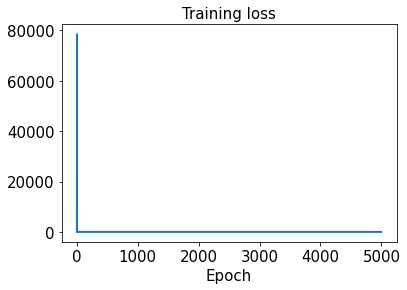

In [9]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

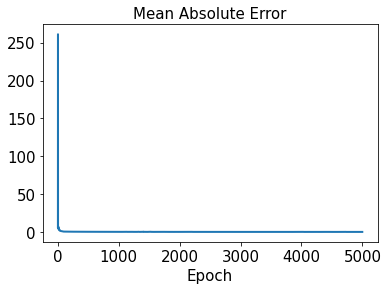

In [10]:
plt.plot(hist['mae'], lw=2)
plt.title('Mean Absolute Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [11]:
test_results = autoencoder.evaluate([x_test, tsr_test])

1/1 [==============================] - 0s 116ms/step - loss: 0.0059 - mae: 0.0000e+00 - mape: 0.0000e+00 - rmse: 0.0000e+00 - msle: 0.0000e+00


In [12]:
decoded_imgs = autoencoder.predict([x_test, tsr_test])

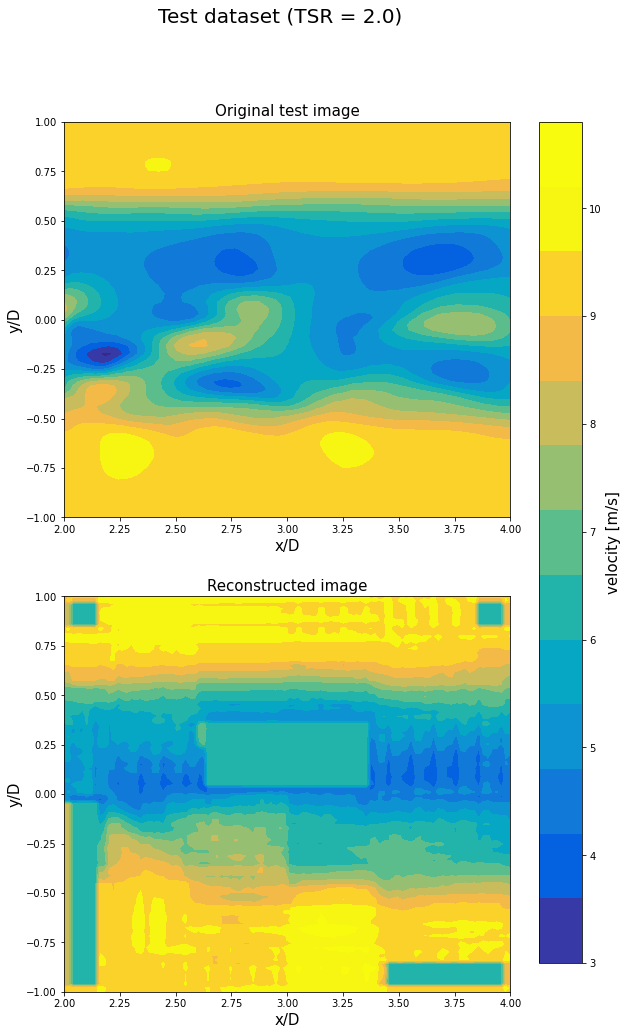

In [13]:
plt.figure(figsize=(8, 16))
xtest_rotate = x_test.T.reshape(100, 100)
decoded_rotate = decoded_imgs.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(2, 1, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, xtest_rotate.T, vmin=3, vmax=10, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(2, 1, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate.T, vmin=3, vmax=10, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)

cax = plt.axes([0.95, 0.15, 0.075, 0.73])
cbar = plt.colorbar(a2, cax=cax)
cbar.set_label('velocity [m/s]', fontsize=15)
cbar.set_ticks([3, 4, 5, 6, 7, 8, 9, 10])

plt.suptitle('Test dataset (TSR = 2.0)',fontsize=20)
plt.show()

In [14]:
error_test = np.abs(decoded_imgs - x_test) / x_test * 100
print(error_test)

[[[[14.293793  ]
   [ 5.979655  ]
   [17.273893  ]
   ...
   [17.359945  ]
   [ 9.832978  ]
   [15.950831  ]]

  [[ 4.037841  ]
   [ 0.99968183]
   [17.827658  ]
   ...
   [17.907969  ]
   [ 2.1464992 ]
   [ 4.3928204 ]]

  [[ 1.2207882 ]
   [ 2.8620462 ]
   [33.57963   ]
   ...
   [33.63964   ]
   [ 8.515724  ]
   [ 4.597041  ]]

  ...

  [[ 0.24459034]
   [ 1.8334446 ]
   [32.828587  ]
   ...
   [32.80358   ]
   [ 7.433734  ]
   [ 3.5371904 ]]

  [[ 0.9535528 ]
   [ 7.1846976 ]
   [ 8.968195  ]
   ...
   [ 8.855783  ]
   [ 4.185141  ]
   [ 0.7206015 ]]

  [[10.297026  ]
   [ 0.55667824]
   [ 7.479237  ]
   ...
   [ 7.2860675 ]
   [ 2.609194  ]
   [10.116263  ]]]]


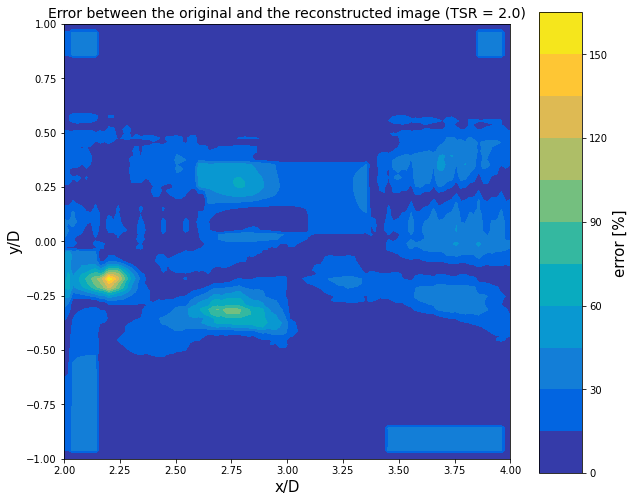

In [15]:
error_test_rotate = error_test.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_rotate.T, levels=11, cmap=parula_map)
ax5.set_title('Error between the original and the reconstructed image (TSR = 2.0)', fontsize=14)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.95, 0.1, 0.075, 0.8])
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label('error [%]', fontsize=15)

plt.show()

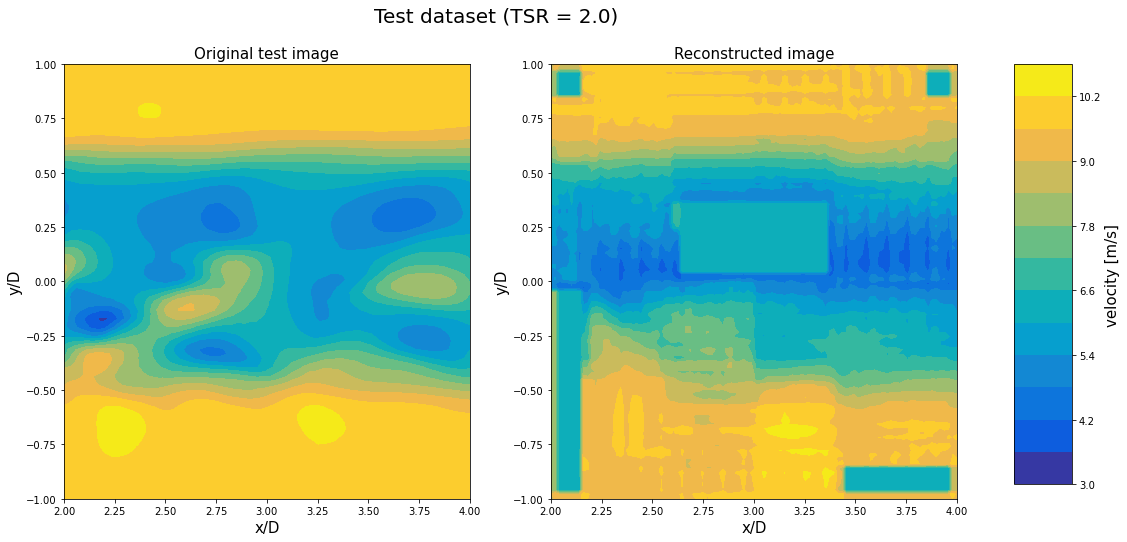

In [16]:
plt.figure(figsize=(16, 8))
xtest_rotate2 = x_test.T.reshape(100, 100)
decoded_rotate2 = decoded_imgs.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, xtest_rotate2.T, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, decoded_rotate2.T, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)

cax = plt.axes([0.95, 0.15, 0.05, 0.73])
cbar = plt.colorbar(cax=cax)
cbar.set_label('velocity [m/s]', fontsize=15)

plt.suptitle('Test dataset (TSR = 2.0)',fontsize=20)
plt.show()

In [17]:
train0 = x_train[0].reshape(1, 100, 100, 1)
train_decode0 = autoencoder.predict([train0, tsr_train[0]]).reshape(100, 100)
print(train_decode0.shape)

(100, 100)


In [18]:
train0_orig = x_train[0].reshape(100, 100)

In [19]:
error_train0 = np.abs(train_decode0 - train0_orig) / train0_orig * 100

In [20]:
print(error_train0)

[[13.931443    5.5692253  16.901419   ... 17.01543     9.509536
  15.694605  ]
 [ 3.5475726   1.5317113  17.370432   ... 17.56054     1.7871884
   4.0912714 ]
 [ 0.6352613   2.2491343  33.140793   ... 33.356712    8.17694
   4.293139  ]
 ...
 [ 1.6544875   0.11220003 31.44599    ... 32.817173    7.441632
   3.5330925 ]
 [ 2.9430928   9.381039    7.030537   ...  8.955622    4.0931926
   0.64673686]
 [ 8.468111    1.5506998   5.447815   ...  7.4713864   2.7841363
  10.254736  ]]


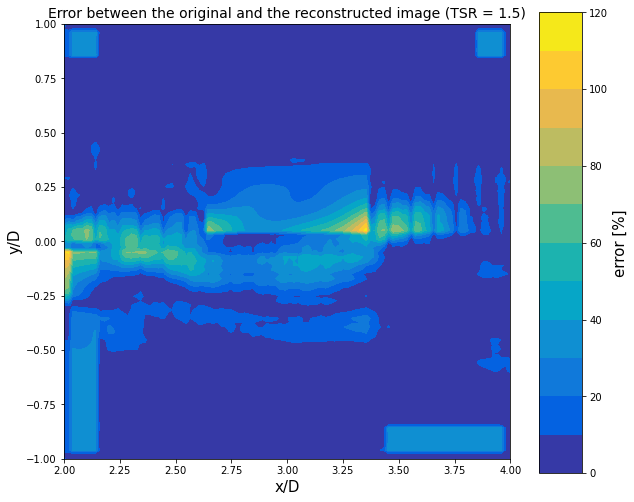

In [21]:
error_train0_rotate = error_train0.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train0_rotate.T, levels=11, cmap=parula_map)
ax5.set_title('Error between the original and the reconstructed image (TSR = 1.5)', fontsize=14)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.95, 0.1, 0.075, 0.8])
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label('error [%]', fontsize=15)

plt.show()

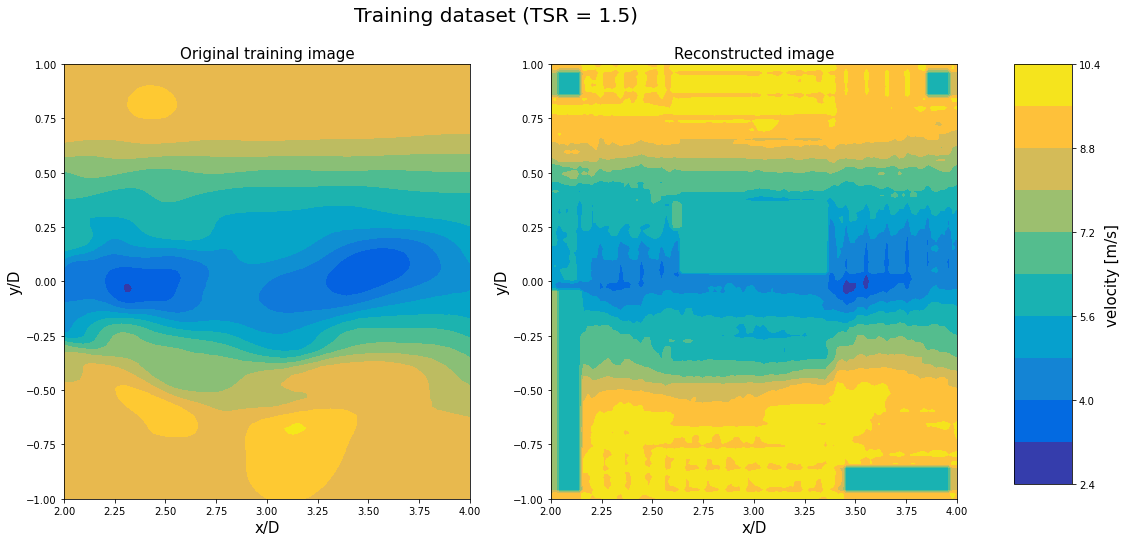

In [22]:
plt.figure(figsize=(16, 8))
#xtest_rotate2 = x_test.T.reshape(100, 100)
#decoded_rotate2 = decoded_imgs.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, train0_orig, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original training image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, train_decode0, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)

cax = plt.axes([0.95, 0.15, 0.05, 0.73])
cbar = plt.colorbar(cax=cax)
cbar.set_label('velocity [m/s]', fontsize=15)

plt.suptitle('Training dataset (TSR = 1.5)',fontsize=20)
plt.show()

In [23]:
print(np.mean(error_train0))

9.954779


In [24]:
print(np.max(error_train0))

113.102005


In [25]:
print(np.mean(error_test))

12.827435


In [26]:
print(np.max(error_test))

158.70572
